In [40]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import gplearn as gpl  
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split

In [7]:
Tiempo = pd.read_excel('Consumo.xlsx')

In [23]:
Tiempo.head()

,fecha,mín,max,prom,Nubosidad,Lluvia,Velocidad viento
0,2004-01-01,8.857143,24.571429,16.714286,23.853679,0.001,23.25
1,2004-01-02,8.500000,24.642857,16.571429,22.364404,0.001,23.25
2,2004-01-03,9.142857,24.285714,16.714286,19.124190,0.001,22.75
3,2004-01-04,9.714286,24.500000,17.107143,19.215350,0.001,22.75
4,2004-01-05,11.000000,25.285714,18.142857,26.441329,0.001,22.75


In [27]:
Tiempo["te"] = np.arange(1, len(Tiempo.index)+1)

In [29]:
Tiempo.head(2)

,fecha,mín,max,prom,Nubosidad,Lluvia,Velocidad viento,te
0,2004-01-01,8.857143,24.571429,16.714286,23.853679,0.001,23.25,1
1,2004-01-02,8.500000,24.642857,16.571429,22.364404,0.001,23.25,2


In [88]:
X_train, X_test, y_train, y_test = train_test_split(Tiempo.te, Tiempo["max"],  test_size = 20, shuffle = False)

In [100]:
function_set = ['add', 'sub', 'mul', 'sin', 'cos']
est = SymbolicRegressor(population_size = 3000, tournament_size=5,
                          generations = 25, stopping_criteria=10,
                          function_set = function_set, metric='rmse',
                          p_crossover=0.65, p_subtree_mutation=0.15,
                          p_hoist_mutation=0.05, p_point_mutation=0.1,
                          verbose = 1, random_state = None, n_jobs = -1)
est.fit(X_train.reshape(-1, 1), y_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    19.52      6.50967e+18       10          25.7661              N/A      1.21m
   1    13.08      1.19375e+11       30            25.15              N/A      4.11m
   2    14.74      1.19356e+11       39          13.2948              N/A      5.06m
   3    19.92      5.32685e+14       34          13.2209              N/A      5.81m
   4    24.46      4.78036e+07       39          13.1522              N/A      6.79m
   5    29.45      5.95566e+07       44          11.8626              N/A      7.77m
   6    35.94      1.34626e+06       43          11.6637              N/A      8.16m
   7    43.05       1.1977e+08       90          10.2827              N/A     10.37m
   8    46.13      3.73625e+14       81          7.27923              N/A  

SymbolicRegressor(const_range=(-1.0, 1.0), feature_names=None,
                  function_set=['add', 'sub', 'mul', 'sin', 'cos'],
                  generations=25, init_depth=(2, 6),
                  init_method='half and half', low_memory=False,
                  max_samples=1.0, metric='rmse', n_jobs=-1, p_crossover=0.65,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_point_replace=0.05, p_subtree_mutation=0.15,
                  parsimony_coefficient=0.001, population_size=3000,
                  random_state=None, stopping_criteria=10, tournament_size=5,
                  verbose=1, warm_start=False)

In [101]:
y_pred = est.predict(X_train.reshape(-1, 1))

In [102]:
y_pred

array([24.68758334, 23.9896812 , 23.35153062, ..., 19.47367346,
       19.46654391, 19.27070482])

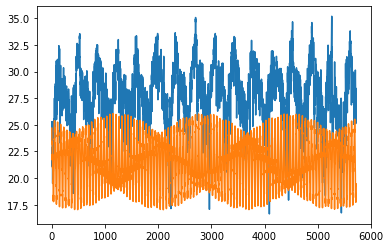

In [106]:
plt.plot(Tiempo["max"][:-20])
plt.plot(y_pred)

In [84]:
len(y_pred)

20

In [98]:
print(est._program)

div(div(X0, mul(0.072, -0.711)), mul(X0, -0.692))


In [48]:
X_train.to_numpy().reshape(1, -1).shape

(1, 5724)

In [51]:
X_train.shape

(5724,)

In [ ]:
def _xexp( x ):
    a = np.exp(x); 
    a[ np.abs(a) > 1e+9 ] = 1e+9
    return a    

In [ ]:
xexp = gpl.functions.make_function( function = _xexp, name='xexp', arity=1 )
#function_set = ['add', 'sub', 'mul', 'div', 'sin', 'log'] #, xexp]
function_set = ['add', 'sub', 'mul', 'div']

In [ ]:
if 'model' in locals(): del model
model = SymbolicRegressor(population_size = 3000, tournament_size=5,
                          generations = 25, stopping_criteria=0.1,
                          function_set = function_set, metric='rmse',
                          p_crossover=0.65, p_subtree_mutation=0.15,
                          p_hoist_mutation=0.05, p_point_mutation=0.1,
                          verbose = 1, random_state = None, n_jobs = -1)

In [ ]:
# Train
t0 = time.time()
model.fit(train_windows.values[:,:-1], train_windows.values[:,-1])
tF = time.time()

In [ ]:
# Predict
sr_y_fit = model.predict(train_windows.values[:,:-1]).reshape(-1,1)
sr_y_pred = model.predict(test_windows.values[:,:-1]).reshape(-1,1)

In [ ]:
# Calculating Errors
sr_residuals = sr_y_pred - testset.iloc[5:,-1].values.reshape(-1,1)
sr_rmse = np.sqrt(np.sum(np.power(sr_residuals,2)) / len(sr_residuals))
print('RMSE = %f' % sr_rmse)
print('Time to train %.2f' % (tF - t0))
print(model._program)

In [ ]:
#################################################
# TRAIN THE NETWORK AND PREDICT - With previous y
#################################################

if 'model_inc' in locals(): del model_inc
model_inc = SymbolicRegressor(population_size = 3000, tournament_size=5,
                          generations = 25, stopping_criteria=0.1,
                          function_set = function_set, metric='rmse',
                          p_crossover=0.65, p_subtree_mutation=0.15,
                          p_hoist_mutation=0.05, p_point_mutation=0.1,
                          verbose = 1, random_state = None, n_jobs = -1)
# Train
t0 = time.time()
model_inc.fit(train_windows_sr_inc.values[:,:-1], train_windows_sr_inc.values[:,-1])
tF = time.time()

# Predict
sr_y_fit_inc = model_inc.predict(train_windows_sr_inc.values[:,:-1]).reshape(-1,1)
sr_y_pred_inc = model_inc.predict(test_windows_sr_inc.values[:,:-1]).reshape(-1,1)

# Calculating Errors
sr_residuals_inc = sr_y_pred_inc - testset.iloc[5:,-1].values.reshape(-1,1)
sr_rmse_inc = np.sqrt(np.sum(np.power(sr_residuals_inc,2)) / len(sr_residuals_inc))
print('RMSE = %f' % sr_rmse_inc)
print('Time to train %.2f' % (tF - t0))
print(model_inc._program)